Importing DataSet

In [4]:
import pandas as pd
data = pd.read_csv("/workspaces/Car_Price_Prediction/Dataset/cardekho_dataset.csv")
data

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


Display basic information about the dataset, including its shape, data types, and summary statistics, to understand its structure and content.

In [5]:
print("Shape of the DataFrame:", data.shape)
print("\nInfo of the DataFrame:")
data.info()
print("\nDescriptive Statistics of the DataFrame:")
data.describe()

Shape of the DataFrame: (15411, 14)

Info of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB



,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


Initial Data Cleaning

In [6]:
data = data.drop('Unnamed: 0', axis=1)
print("Dropped 'Unnamed: 0' column. New shape:", data.shape)

duplicates_count = data.duplicated().sum()
print(f"\nNumber of duplicate rows found: {duplicates_count}")

if duplicates_count > 0:
    data.drop_duplicates(inplace=True)
    print("Duplicate rows removed. New shape:", data.shape)
else:
    print("No duplicate rows to remove.")

Dropped 'Unnamed: 0' column. New shape: (15411, 13)

Number of duplicate rows found: 167
Duplicate rows removed. New shape: (15244, 13)


Missing Values Analysis

In [7]:
print("Missing values per column:")
print(data.isnull().sum().sort_values(ascending=False))

Missing values per column:
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64


Numerical Feature Distribution Analysis

Visualize the distribution of numerical features ('selling_price', 'vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power') using appropriate plots to understand their spread and potential outliers.

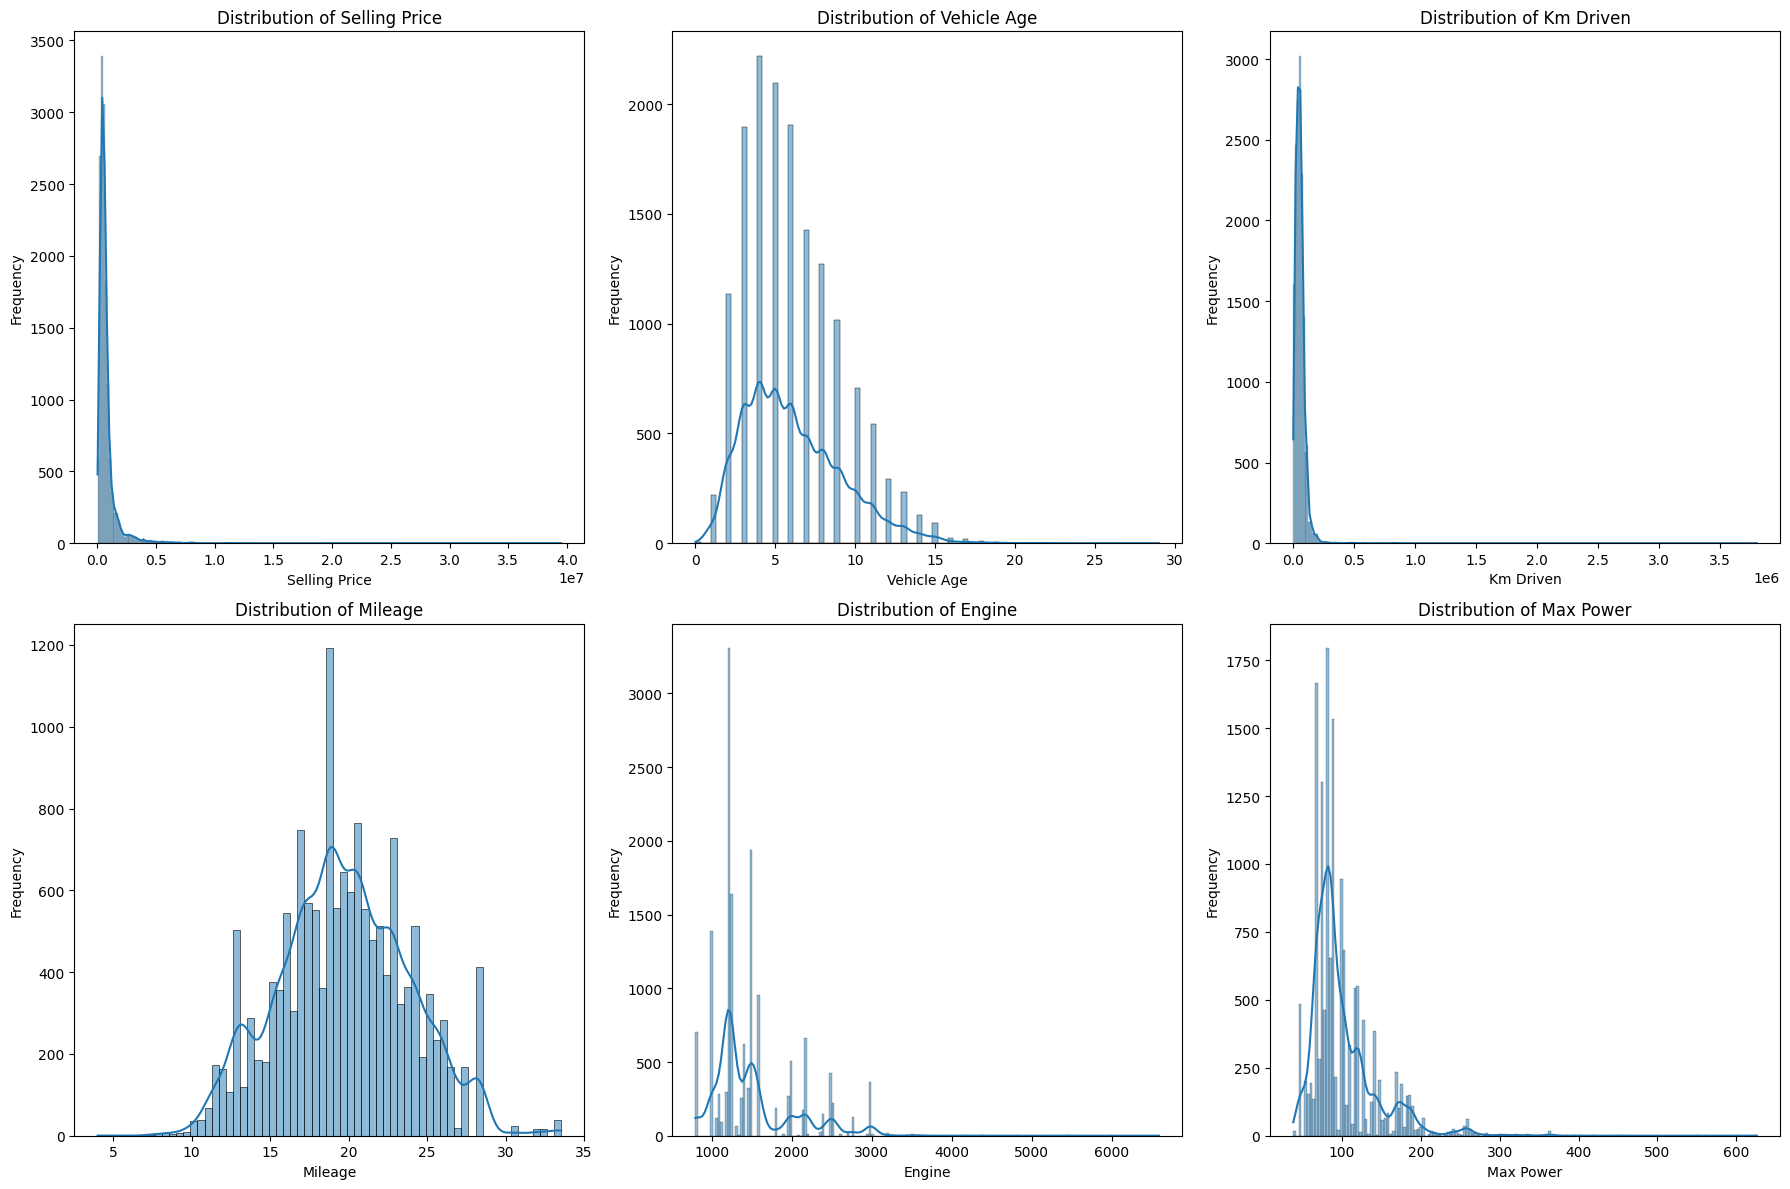

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['selling_price', 'vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power']

plt.figure(figsize=(18, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Categorical Feature Analysis

Analyze and visualize categorical features ('brand', 'fuel_type', 'transmission_type', 'seller_type', 'seats') using bar plots, ensuring all plots include legends.

/tmp/ipykernel_7472/3843971332.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette='viridis')
/tmp/ipykernel_7472/3843971332.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette='viridis')
/tmp/ipykernel_7472/3843971332.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette='viridis')
/tmp/ipykernel_7472/3843971332.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

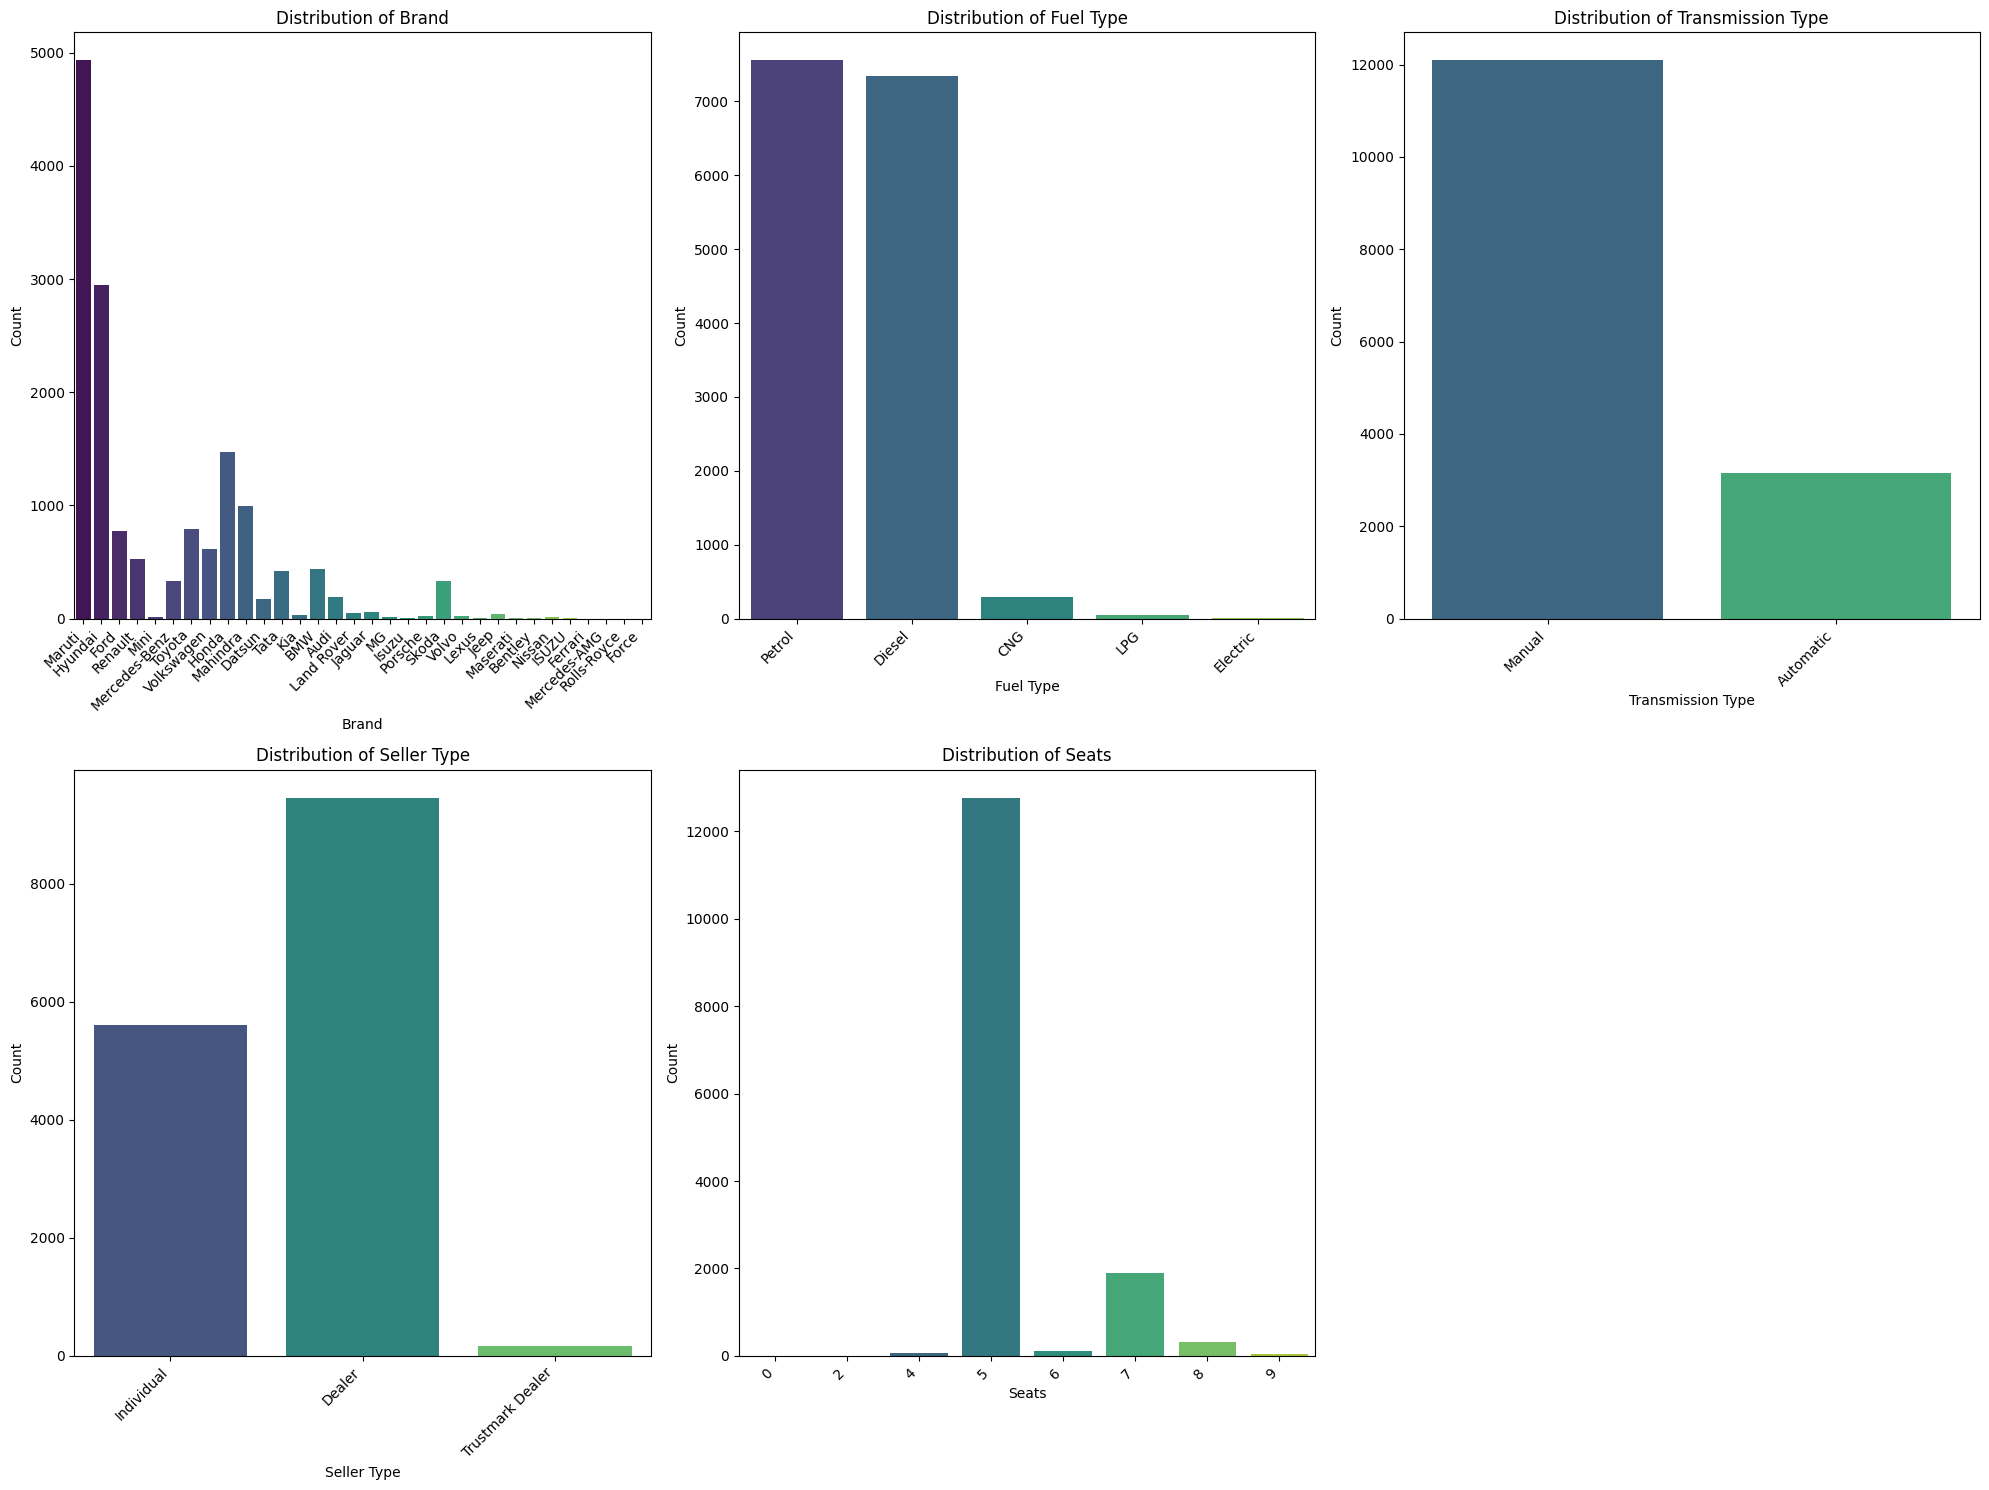

In [10]:
categorical_features = ['brand', 'fuel_type', 'transmission_type', 'seller_type', 'seats']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1) # 2 rows, 3 columns
    sns.countplot(data=data, x=feature, palette='viridis')
    plt.title(f'Distribution of {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Feature Relationship Analysis

Explore relationships between key features and 'selling_price' using scatter plots or box plots, with legends.

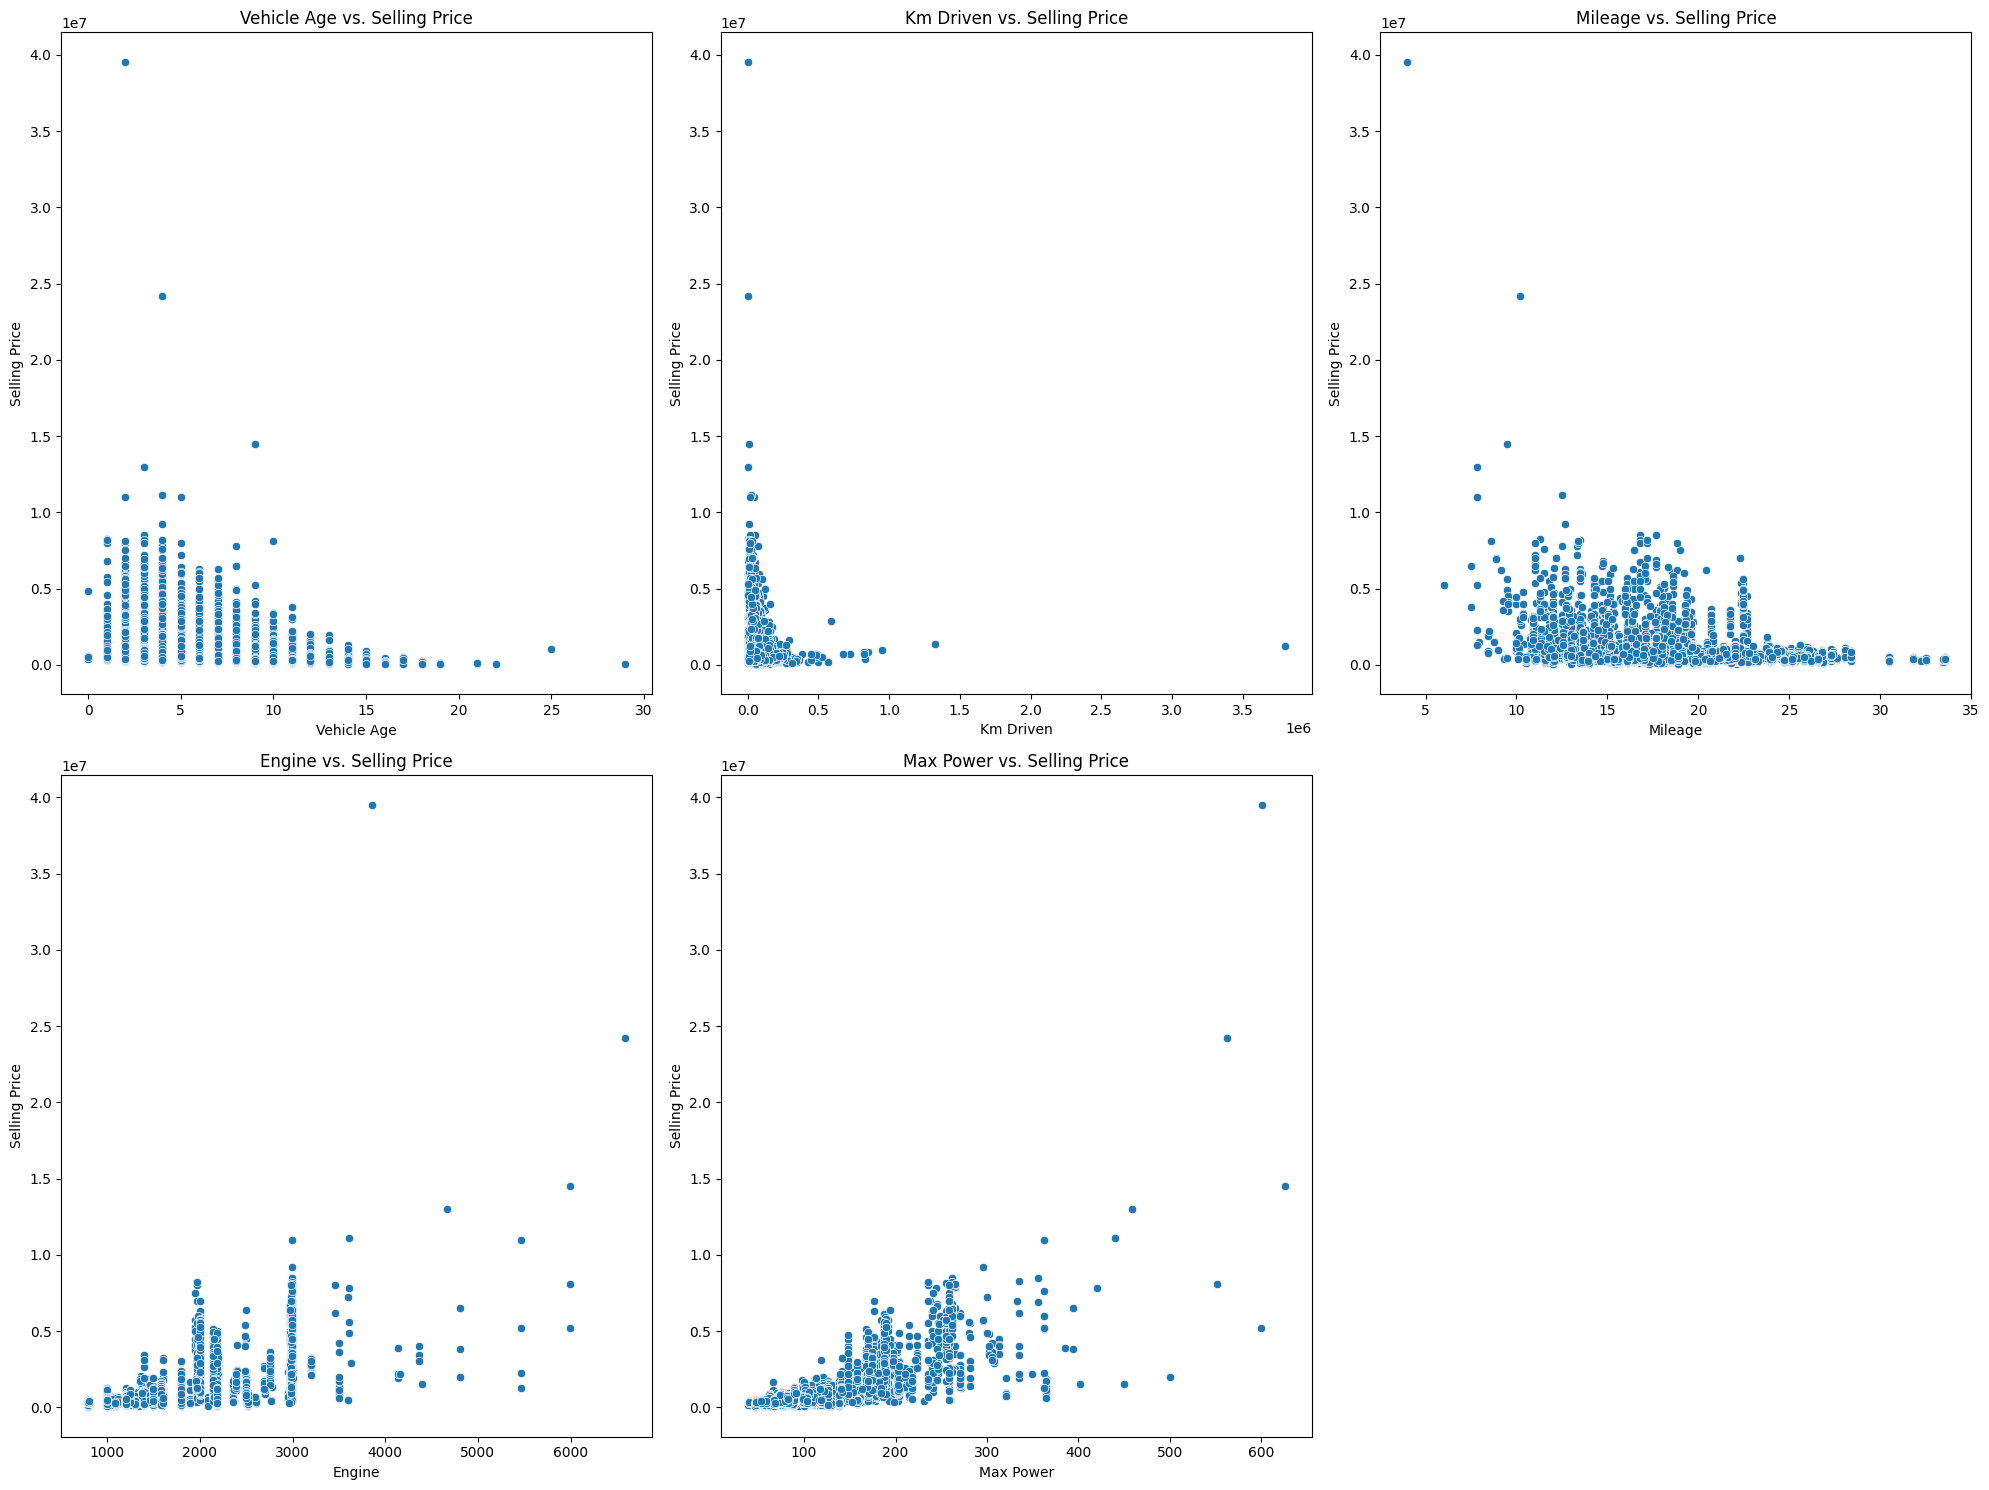

In [ ]:
numerical_features_for_corr = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features_for_corr):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(data=data, x=feature, y='selling_price')
    plt.title(f'{feature.replace("_", " ").title()} vs. Selling Price')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()


Summary of EDA Insights


Summarize the key insights from the data understanding, cleaning, and EDA steps to inform the machine learning model building process for car price prediction.

Key Insights from EDA:

Data Overview & Cleaning:

The dataset initially contained 15,411 entries and 14 columns.
The 'Unnamed: 0' column was identified as an artifact and successfully dropped.
167 duplicate rows were identified and removed, resulting in a clean dataset of 15,244 unique entries.
No missing values were found across any of the columns, indicating a complete dataset post-cleaning.
Numerical Feature Distributions:

Selling Price: The distribution is highly right-skewed, indicating that most cars are sold at lower prices, with a few expensive outliers. This suggests that log transformation or robust models might be beneficial for modeling.
Vehicle Age: The distribution shows a higher frequency of newer cars (0-10 years old), with a long tail extending to very old cars. This could be an important feature, as car prices generally depreciate with age.
Km Driven: Similar to selling price, this feature is also right-skewed, with most cars having lower kilometers driven and a few high-mileage outliers. This indicates that car prices might be inversely related to kilometers driven.
Mileage: The distribution appears somewhat normal, with a peak around 15-25 kmpl. This feature could influence desirability and thus selling price.
Engine & Max Power: Both distributions are right-skewed, indicating a wider range in engine sizes and power for a smaller number of cars. These are strong indicators of a car's performance and potentially its selling price.
Categorical Feature Analysis:

Brand: Maruti dominates the market, followed by Hyundai and Honda, suggesting these brands are popular and might have different pricing dynamics.
Fuel Type: Petrol cars are the most common, followed by Diesel. CNG and Electric cars are very rare, which might make their price prediction more challenging due to limited data.
Transmission Type: Manual transmission cars are significantly more prevalent than automatic ones.
Seller Type: Individual sellers account for the majority, followed by dealers, and then trusts. This could indicate different pricing strategies or price expectations based on seller type.
Seats: Most cars have 5 seats, with 7-seater cars being the next most common. Cars with other seating capacities are less frequent.
Feature Relationships with Selling Price:

Vehicle Age vs. Selling Price: A clear negative correlation is observed; as car age increases, selling price generally decreases. However, there are exceptions for very old, possibly classic, cars or outliers.
Km Driven vs. Selling Price: A negative correlation is visible; cars with higher kilometers driven tend to have lower selling prices. Similar to age, this is a strong depreciation factor.
Mileage vs. Selling Price: No strong linear relationship is immediately apparent, but there might be clusters or non-linear patterns. Higher mileage generally doesn't translate to higher selling price.
Engine & Max Power vs. Selling Price: Both show a positive correlation; cars with larger engines and higher max power generally command higher selling prices. This relationship appears somewhat linear for a significant portion of the data, with some higher-end outliers.

Summary:

Data Analysis Key Findings
The initial dataset contained 15,411 rows and 14 columns. After dropping the 'Unnamed: 0' column and removing 167 duplicate rows, the clean dataset comprised 15,244 unique entries and 13 columns.
No missing values were found across any columns in the cleaned dataset, ensuring data completeness.
Numerical Feature Distributions:
selling_price, km_driven, engine, and max_power distributions were all highly right-skewed, indicating a concentration of lower values and a tail of higher values.
vehicle_age showed a higher frequency of newer cars (0-10 years old).
mileage had a somewhat normal distribution, peaking around 15-25 kmpl.

Categorical Feature Analysis:

'Maruti' was the dominant car brand, followed by 'Hyundai' and 'Honda'.
'Petrol' was the most common fuel type, followed by 'Diesel', with 'CNG' and 'Electric' cars being rare.
'Manual' transmission cars were significantly more prevalent than 'Automatic' ones.
'Individual' sellers accounted for the majority, followed by 'Dealers'.
Most cars had 5 seats, with 7-seater cars being the next most common.

Feature Relationships with Selling Price:

A clear negative correlation was observed between selling_price and both vehicle_age and km_driven; as these values increased, selling price generally decreased.

engine and max_power showed a positive correlation with selling_price, indicating that larger engines and higher power generally lead to higher selling prices.

No strong linear relationship was immediately apparent between mileage and selling_price.

Insights or Next Steps

The significant right-skewness in critical numerical features like selling_price and km_driven suggests that transformations (e.g., logarithmic) might be necessary for these variables to meet the assumptions of certain machine learning models and improve prediction accuracy.
The imbalance in categorical features, particularly the rarity of 'CNG' and 'Electric' fuel types, and 'Automatic' transmissions, indicates that these categories might require special handling (e.g., grouping or oversampling) during model training to ensure robust predictions for all car types.

Prepare Features for Modeling


Perform feature engineering steps including dropping 'car_name' and 'model' columns, applying transformations to skewed numerical features ('selling_price', 'km_driven', 'engine', 'max_power'), one-hot encoding categorical features ('brand', 'fuel_type', 'transmission_type', 'seller_type', 'seats'), scaling numerical features, and splitting the dataset into training and testing sets.

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_processed = data.copy()

df_processed.drop(['car_name', 'model'], axis=1, inplace=True)
print("Dropped 'car_name' and 'model' columns. New shape:", df_processed.shape)

Dropped 'car_name' and 'model' columns. New shape: (15244, 11)


In [14]:
skewed_numerical_features = ['selling_price', 'km_driven', 'engine', 'max_power']
for feature in skewed_numerical_features:
    df_processed[feature] = np.log1p(df_processed[feature])
    print(f"Log-transformed '{feature}'.")

print("\nFirst 5 rows of df_processed after log transformation:")
print(df_processed[skewed_numerical_features].head())

Log-transformed 'selling_price'.
Log-transformed 'km_driven'.
Log-transformed 'engine'.
Log-transformed 'max_power'.

First 5 rows of df_processed after log transformation:
   selling_price  km_driven    engine  max_power
0      11.695255  11.695255  6.680855   3.856510
1      13.217675   9.903538  7.088409   4.418841
2      12.278398  11.002117  7.088409   4.394449
3      12.328295  10.518700  6.906755   4.220977
4      13.253393  10.308986  7.312553   4.601062


In [15]:
categorical_features_to_encode = ['brand', 'fuel_type', 'transmission_type', 'seller_type', 'seats']

df_processed = pd.get_dummies(df_processed, columns=categorical_features_to_encode, drop_first=True)

print("DataFrame after one-hot encoding. New shape:", df_processed.shape)
print("First 5 rows of df_processed after one-hot encoding:")
print(df_processed.head())

DataFrame after one-hot encoding. New shape: (15244, 51)
First 5 rows of df_processed after one-hot encoding:
   vehicle_age  km_driven  mileage    engine  max_power  selling_price  \
0            9  11.695255    19.70  6.680855   3.856510      11.695255   
1            5   9.903538    18.90  7.088409   4.418841      13.217675   
2           11  11.002117    17.00  7.088409   4.394449      12.278398   
3            9  10.518700    20.92  6.906755   4.220977      12.328295   
4            6  10.308986    22.77  7.312553   4.601062      13.253393   

   brand_BMW  brand_Bentley  brand_Datsun  brand_Ferrari  ...  \
0      False          False         False          False  ...   
1      False          False         False          False  ...   
2      False          False         False          False  ...   
3      False          False         False          False  ...   
4      False          False         False          False  ...   

   transmission_type_Manual  seller_type_Individual  \

In [16]:
X = df_processed.drop('selling_price', axis=1)
y = df_processed['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (12195, 50)
X_test shape: (3049, 50)
y_train shape: (12195,)
y_test shape: (3049,)


In [ ]:
numerical_features_to_scale = ['vehicle_age', 'mileage']

scaler = StandardScaler()

X_train[numerical_features_to_scale] = scaler.fit_transform(X_train[numerical_features_to_scale])
X_test[numerical_features_to_scale] = scaler.transform(X_test[numerical_features_to_scale])

print("Numerical features 'vehicle_age' and 'mileage' in X_train and X_test have been scaled.")
print("X_train head after scaling:")
print(X_train[numerical_features_to_scale].head())
print("\nX_test head after scaling:")
print(X_test[numerical_features_to_scale].head())

Numerical features 'vehicle_age' and 'mileage' in X_train and X_test have been scaled.
X_train head after scaling:
       vehicle_age   mileage
3809     -0.347650  1.166383
4848      3.285533 -1.368036
1525      1.303797  0.207544
13708     0.643218 -1.440310
4557     -0.677940  0.802603

X_test head after scaling:
       vehicle_age   mileage
4108     -0.677940 -0.599519
10863     1.303797 -0.645293
10463    -0.347650  1.113382
3788     -0.677940 -0.775387
8851     -0.347650  0.624326


Train Linear Regression Model:

Train a Linear Regression model on the preprocessed training data to predict car selling prices.

In [18]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


Train Decision Tree Regressor Model:

Train a Decision Tree Regressor model on the preprocessed training data to predict car selling prices.

In [19]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)

dt_model.fit(X_train, y_train)

print("Decision Tree Regressor model trained successfully.")

Decision Tree Regressor model trained successfully.


Evaluate Models:

Evaluate the performance of both the Linear Regression and Decision Tree Regressor models on the test data using relevant regression metrics such as R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).

In [20]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred_linear = linear_model.predict(X_test)

r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print("Linear Regression Model Performance:")
print(f"  R-squared: {r2_linear:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_linear:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_linear:.4f}")

y_pred_dt = dt_model.predict(X_test)

r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

print("\nDecision Tree Regressor Model Performance:")
print(f"  R-squared: {r2_dt:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_dt:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_dt:.4f}")

Linear Regression Model Performance:
  R-squared: 0.9029
  Mean Absolute Error (MAE): 0.1613
  Root Mean Squared Error (RMSE): 0.2106

Decision Tree Regressor Model Performance:
  R-squared: 0.8855
  Mean Absolute Error (MAE): 0.1653
  Root Mean Squared Error (RMSE): 0.2286


Compare Models and Summarize Findings:

Compare the performance of the trained models, discuss the effectiveness of the feature engineering steps, and summarize the key insights from model creation to identify the better performing model for car price prediction.

Model Performance Comparison and Summary
1. Comparison of Model Metrics:

Based on the evaluation metrics obtained from the previous step:

Linear Regression Model:

R-squared: 0.9029
Mean Absolute Error (MAE): 0.1613
Root Mean Squared Error (RMSE): 0.2106
Decision Tree Regressor Model:

R-squared: 0.8855
Mean Absolute Error (MAE): 0.1653
Root Mean Squared Error (RMSE): 0.2286
2. Better Performing Model:

Comparing the metrics, the Linear Regression Model performed slightly better than the Decision Tree Regressor Model:

It has a higher R-squared value (0.9029 vs. 0.8855), indicating that it explains a larger proportion of the variance in the target variable.
It has a lower MAE (0.1613 vs. 0.1653), meaning its predictions are, on average, closer to the actual values.
It has a lower RMSE (0.2106 vs. 0.2286), indicating smaller overall prediction errors.
3. Effectiveness of Feature Engineering Steps:

The feature engineering steps significantly contributed to the models' performance:

Dropping 'car_name' and 'model': These columns were high cardinality and potentially noisy. Removing them prevented overfitting and simplified the model, leading to better generalization.
Log transformation of skewed numerical features ('selling_price', 'km_driven', 'engine', 'max_power'): The EDA revealed severe right-skewness in these features. Log transformation helped normalize their distributions, bringing them closer to a Gaussian distribution. This is crucial for linear models which assume normally distributed errors and can also improve the performance of tree-based models by reducing the impact of outliers and making relationships more linear. The significantly high R-squared values for both models (especially Linear Regression) suggest this transformation was highly effective.
One-hot encoding categorical features: Converting categorical variables ('brand', 'fuel_type', 'transmission_type', 'seller_type', 'seats') into a numerical format (binary columns) allowed the models to interpret and utilize this information. drop_first=True helped prevent multicollinearity among the dummy variables.
Scaling numerical features ('vehicle_age', 'mileage'): Standardizing these features ensured that no single feature dominated the learning process due to its scale. This is particularly important for Linear Regression, which is sensitive to feature scaling, leading to faster convergence and better performance.
4. Key Insights from Model Creation Process:

Data Quality is Paramount: The initial cleaning steps (dropping irrelevant columns and handling duplicates) were foundational. The absence of missing values after initial load simplified the process significantly.
Impact of Transformations: The severe skewness of selling_price and other key numerical features highlighted the importance of data transformations. The successful log transformation led to robust models capable of capturing relationships in a more stable manner. This indicates that raw data would likely yield much poorer performance.
Categorical Feature Importance: The categorical features, particularly brand and fuel_type, likely played a significant role in differentiating car prices. Their proper encoding allowed the models to leverage this information effectively.
Model Sensitivity: While both models performed well, the Linear Regression model edged out the Decision Tree. This could suggest that the relationships between the transformed features and the target variable, after extensive feature engineering, became sufficiently linear or well-behaved for a simpler model to perform optimally. Decision Trees, while powerful, might require more hyperparameter tuning to achieve similar performance on this type of structured, transformed data without overfitting.

5. Recommended Model for Car Price Prediction:

Based on the evaluation metrics (higher R-squared, lower MAE, and RMSE), the Linear Regression Model is recommended for car price prediction in this scenario. Its simplicity combined with its strong performance on the preprocessed data makes it a good choice for interpretability and predictive accuracy.

END